In [ ]:
![image-2.png](attachment:image-2.png)

## The Pandemic that should never be forgotten!!

The COVID-19 pandemic, the first modern pandemic, will define this era and no one who lives through this will ever forget it. It is impossible to overstate the pain that people are feeling now and will continue to feel for years to come, he said, adding that the disease is disproportionately hurting poorer communities and racial minorities.

Likewise, the economic impact of the shutdown is hitting low-income, minority workers the hardest.Policymakers and bureaucrats will need to make sure that, as the country opens up, the recovery doesn't make inequality even worse than it already is.

Countries are beginning to deploy COVID-19 vaccines, bringing new hope to the fight against the global pandemic. WHO, UNICEF, Gavi and many other partners are working together to support countries in preparing for COVID-19 vaccine introduction. With careful planning, countries can ensure infrastructure is in place and the technical support available to safely deliver COVID-19 vaccines.

In [7]:
packages <- c('dplyr','ggplot2','tidyverse','countrycode','plotly','tidyr','lubridate','readr','skimr','naniar','ggmap','RColorBrewer','rworldmap')

install_package <- packages %in% row.names(installed.packages())
if (any (install_package ==  FALSE))
  install.packages(packages[!install_package])

sapply(packages, require, character.only = TRUE)


Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.1.0     v purrr   0.3.4
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: countrycode

Loading required package: plotly


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


Loading required package: lubri

dplyr      ggplot2    tidyverse  countrycode       plotly        tidyr 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   lubridate        readr        skimr       naniar        ggmap RColorBrewer 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
   rworldmap 
        TRUE

In [1]:
# Loading the data set (step)

vaccine_data <- read.csv("COVID_Vaccine_data.csv")

head (vaccine_data)

str(vaccine_data)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,Afghanistan,AFG,2/22/2021,0,0,NA,NA,NA,0,0,NA,NA,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
2,Afghanistan,AFG,2/23/2021,NA,NA,NA,NA,1367,NA,NA,NA,35,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
3,Afghanistan,AFG,2/24/2021,NA,NA,NA,NA,1367,NA,NA,NA,35,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
4,Afghanistan,AFG,2/25/2021,NA,NA,NA,NA,1367,NA,NA,NA,35,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
5,Afghanistan,AFG,2/26/2021,NA,NA,NA,NA,1367,NA,NA,NA,35,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm
6,Afghanistan,AFG,2/27/2021,NA,NA,NA,NA,1367,NA,NA,NA,35,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2021-03/16/c_139814668.htm


'data.frame':	8451 obs. of  15 variables:
 $ country                            : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ iso_code                           : chr  "AFG" "AFG" "AFG" "AFG" ...
 $ date                               : chr  "2/22/2021" "2/23/2021" "2/24/2021" "2/25/2021" ...
 $ total_vaccinations                 : int  0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_vaccinated                  : int  0 NA NA NA NA NA 8200 NA NA NA ...
 $ people_fully_vaccinated            : int  NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_raw             : int  NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations                 : int  NA 1367 1367 1367 1367 1367 1367 1580 1794 2008 ...
 $ total_vaccinations_per_hundred     : num  0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_vaccinated_per_hundred      : num  0 NA NA NA NA NA 0.02 NA NA NA ...
 $ people_fully_vaccinated_per_hundred: num  NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_per_mil

In [2]:
#Inspect the Dimensions
dim (vaccine_data)

[1] 8451   15

In [3]:
# Drop unneccesary features source_name and source_website
vaccine_data_copy <- vaccine_data[,1:13]
colnames(vaccine_data_copy)

[1] "country"                             "iso_code"                           
 [3] "date"                                "total_vaccinations"                 
 [5] "people_vaccinated"                   "people_fully_vaccinated"            
 [7] "daily_vaccinations_raw"              "daily_vaccinations"                 
 [9] "total_vaccinations_per_hundred"      "people_vaccinated_per_hundred"      
[11] "people_fully_vaccinated_per_hundred" "daily_vaccinations_per_million"     
[13] "vaccines"

In [4]:
# Total NA in the entire data set

paste("Total NA count:: ",sum(is.na(vaccine_data_copy)))


[1] "Total NA count::  28914"

In [8]:
# % of NA's in entire dataset
((sum(is.na(vaccine_data_copy)) / prod(dim(vaccine_data_copy))) * 100) %>%
round (2)

[1] 26.32

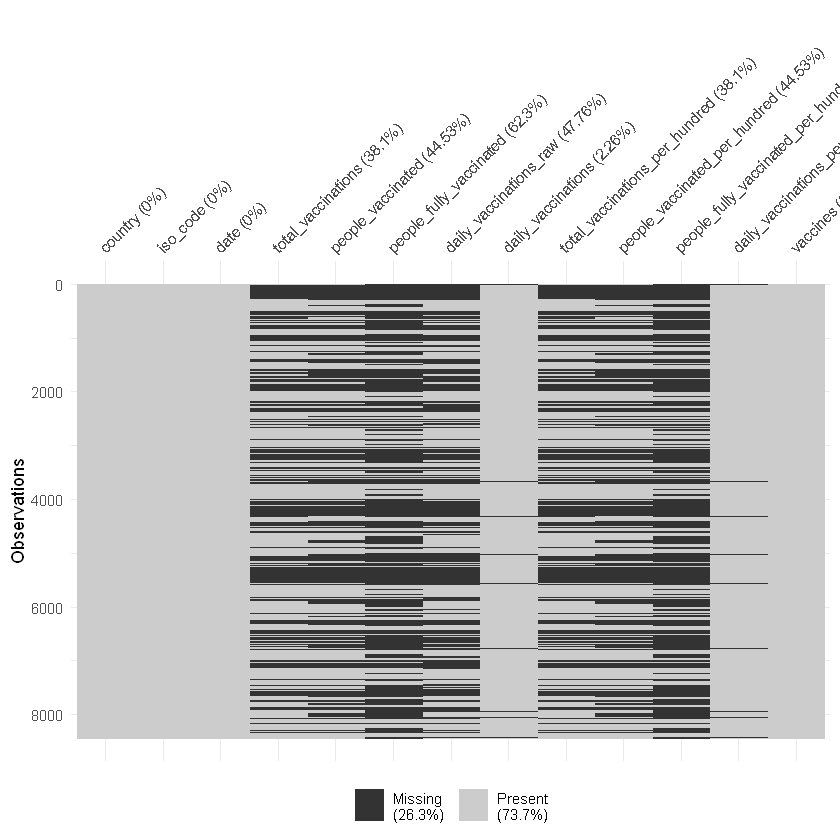

In [10]:
# NA's per feature can also be visualised as below

vis_miss(vaccine_data_copy)


In [11]:
#total number of NA per feature

data.frame("Total_NA" = colSums(is.na(vaccine_data_copy))) %>%
mutate ("Percentage_of_NA" = (colSums(is.na(vaccine_data_copy))/dim(vaccine_data_copy)[1]) %>% 
        round (3) * 100)

,Total_NA,Percentage_of_NA
,<dbl>,<dbl>
country,0,0.0
iso_code,0,0.0
date,0,0.0
total_vaccinations,3220,38.1
people_vaccinated,3763,44.5
people_fully_vaccinated,5265,62.3
daily_vaccinations_raw,4036,47.8
daily_vaccinations,191,2.3
total_vaccinations_per_hundred,3220,38.1


In [12]:
# Countries for which the data is collected

unique(vaccine_data_copy$country)

[1] "Afghanistan"                      "Albania"                         
  [3] "Algeria"                          "Andorra"                         
  [5] "Angola"                           "Anguilla"                        
  [7] "Antigua and Barbuda"              "Argentina"                       
  [9] "Australia"                        "Austria"                         
 [11] "Azerbaijan"                       "Bahamas"                         
 [13] "Bahrain"                          "Bangladesh"                      
 [15] "Barbados"                         "Belarus"                         
 [17] "Belgium"                          "Belize"                          
 [19] "Bermuda"                          "Bolivia"                         
 [21] "Brazil"                           "Bulgaria"                        
 [23] "Cambodia"                         "Canada"                          
 [25] "Cayman Islands"                   "Chile"                           
 [27] "China"                            "Colombia"                        
 [29] "Costa Rica"                       "Cote d'Ivoire"                   
 [31] "Croatia"                          "Cyprus"                          
 [33] "Czechia"                          "Denmark"                         
 [35] "Dominica"                         "Dominican Republic"              
 [37] "Ecuador"                          "Egypt"                           
 [39] "El Salvador"                      "England"                         
 [41] "Equatorial Guinea"                "Estonia"                         
 [43] "Faeroe Islands"                   "Falkland Islands"                
 [45] "Finland"                          "France"                          
 [47] "Germany"                          "Ghana"                           
 [49] "Gibraltar"                        "Greece"                          
 [51] "Greenland"                        "Grenada"                         
 [53] "Guatemala"                        "Guernsey"                        
 [55] "Guinea"                           "Guyana"                          
 [57] "Honduras"                         "Hong Kong"                       
 [59] "Hungary"                          "Iceland"                         
 [61] "India"                            "Indonesia"                       
 [63] "Iran"                             "Ireland"                         
 [65] "Isle of Man"                      "Israel"                          
 [67] "Italy"                            "Jamaica"                         
 [69] "Japan"                            "Jersey"                          
 [71] "Jordan"                           "Kazakhstan"                      
 [73] "Kenya"                            "Kuwait"                          
 [75] "Laos"                             "Latvia"                          
 [77] "Lebanon"                          "Liechtenstein"                   
 [79] "Lithuania"                        "Luxembourg"                      
 [81] "Macao"                            "Malawi"                          
 [83] "Malaysia"                         "Maldives"                        
 [85] "Malta"                            "Mauritius"                       
 [87] "Mexico"                           "Moldova"                         
 [89] "Monaco"                           "Mongolia"                        
 [91] "Montenegro"                       "Montserrat"                      
 [93] "Morocco"                          "Mozambique"                      
 [95] "Myanmar"                          "Namibia"                         
 [97] "Nepal"                            "Netherlands"                     
 [99] "New Zealand"                      "Nigeria"                         
[101] "North Macedonia"                  "Northern Cyprus"                 
[103] "Northern Ireland"                 "Norway"                          
[105] "Oman"                             "Pakistan

In [13]:
# There is United kingdom and also its sovient countries included in the data, 
# let us verify if they have same number of records included

vaccine_data_copy %>%
filter (country %in% c('United Kingdom','Northern Ireland','England','Wales','Scotland'))%>%
group_by(country)%>%
count()

country,n
<chr>,<int>
England,104
Northern Ireland,104
Scotland,104
United Kingdom,104
Wales,104


In [14]:
#Data Cleaning
#There are few steps in this section:

#As shown by .head() method, our data obviously contains missing values, so we'll need to deal with it somehow
#Some of the country names appeared in the dataset, does not represent a single country (constituent countries) and also the union territories
#Multiple vaccines are updated in a single row and needs to be separated

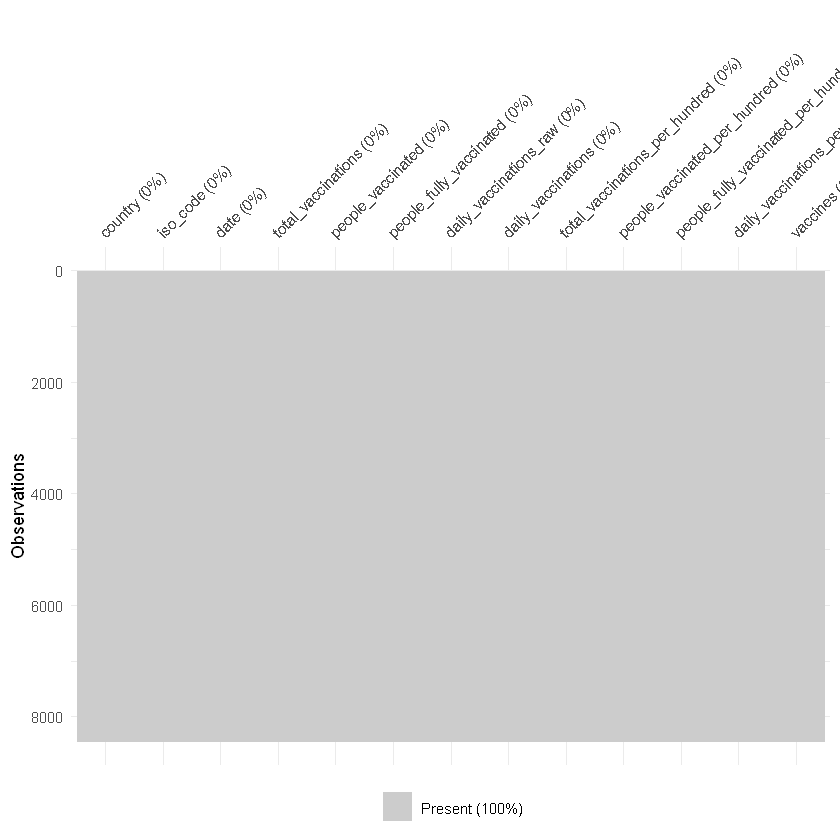

In [15]:
# Handling the missing values

vaccine_data_copy[is.na(vaccine_data_copy)] = 0

vis_miss(vaccine_data_copy)

# there are no more NA in the data set

In [16]:
# Removing the UK soviet countries
# I also consider to eliminate Gibraltar, Isle of Man, Cayman Islands, Falkland Islands, Guernsey, 
# Saint Helena, Turks and Caicos Islands (UK pertinence), Faeroe Islands (Denmark pertinence).
remove_countries = c('England','Northern Ireland','Scotland','Wales','Falkland Islands','Faeroe Islands','Isle of Man','Cayman Islands','Saint Helena','Saint Lucia','Saint Vincent and the Grenadines','Saint Kitts and Nevis')

vaccine_data_copy <- vaccine_data_copy %>%
  filter (!country %in% remove_countries) 

unique(vaccine_data_copy$country)

[1] "Afghanistan"              "Albania"                 
  [3] "Algeria"                  "Andorra"                 
  [5] "Angola"                   "Anguilla"                
  [7] "Antigua and Barbuda"      "Argentina"               
  [9] "Australia"                "Austria"                 
 [11] "Azerbaijan"               "Bahamas"                 
 [13] "Bahrain"                  "Bangladesh"              
 [15] "Barbados"                 "Belarus"                 
 [17] "Belgium"                  "Belize"                  
 [19] "Bermuda"                  "Bolivia"                 
 [21] "Brazil"                   "Bulgaria"                
 [23] "Cambodia"                 "Canada"                  
 [25] "Chile"                    "China"                   
 [27] "Colombia"                 "Costa Rica"              
 [29] "Cote d'Ivoire"            "Croatia"                 
 [31] "Cyprus"                   "Czechia"                 
 [33] "Denmark"                  "Dominica"                
 [35] "Dominican Republic"       "Ecuador"                 
 [37] "Egypt"                    "El Salvador"             
 [39] "Equatorial Guinea"        "Estonia"                 
 [41] "Finland"                  "France"                  
 [43] "Germany"                  "Ghana"                   
 [45] "Gibraltar"                "Greece"                  
 [47] "Greenland"                "Grenada"                 
 [49] "Guatemala"                "Guernsey"                
 [51] "Guinea"                   "Guyana"                  
 [53] "Honduras"                 "Hong Kong"               
 [55] "Hungary"                  "Iceland"                 
 [57] "India"                    "Indonesia"               
 [59] "Iran"                     "Ireland"                 
 [61] "Israel"                   "Italy"                   
 [63] "Jamaica"                  "Japan"                   
 [65] "Jersey"                   "Jordan"                  
 [67] "Kazakhstan"               "Kenya"                   
 [69] "Kuwait"                   "Laos"                    
 [71] "Latvia"                   "Lebanon"                 
 [73] "Liechtenstein"            "Lithuania"               
 [75] "Luxembourg"               "Macao"                   
 [77] "Malawi"                   "Malaysia"                
 [79] "Maldives"                 "Malta"                   
 [81] "Mauritius"                "Mexico"                  
 [83] "Moldova"                  "Monaco"                  
 [85] "Mongolia"                 "Montenegro"              
 [87] "Montserrat"               "Morocco"                 
 [89] "Mozambique"               "Myanmar"                 
 [91] "Namibia"                  "Nepal"                   
 [93] "Netherlands"              "New Zealand"             
 [95] "Nigeria"                  "North Macedonia"         
 [97] "Northern Cyprus"          "Norway"                  
 [99] "Oman"                     "Pakistan"                
[101] "Panama"                   "Paraguay"                
[103] "Peru"                     "Philippines"             
[105] "Poland"                   "Portugal"                
[107] "Qatar"                    "Romania"                 
[109] "Russia"                   "Rwanda"                  
[111] "San Marino"               "Saudi Arabia"            
[113] "Senegal"                  "Serbia"                  
[115] "Seychelles"               "Sierra Leone"            
[117] "Singapore"                "Slovakia"                
[119] "Slovenia"                 "South Africa"            
[121] "South Korea"              "Spain"                   
[123] "Sri Lanka"                "Suriname"                
[125] "Sweden"                   "Switzerland"             
[127] "Taiwan"                   "Thailand"                
[129] "Togo"                     "Trinidad and Tobago"     
[131] "Tunisia"                  "Turkey"                  
[133] "Turks and Caicos Islands" "Uganda" 

In [17]:
# Below the Vaccines use world wide
vaccine_data_copy$vaccines <- str_replace_all(vaccine_data_copy$vaccines, " ","")
# remove all spaces in between
vaccine_val<- unique(vaccine_data_copy$vaccines)
vaccine<- vector()

for (i in vaccine_val){
    for (j in strsplit(i, ",")){
        vaccine<- c(vaccine, j)
    }
}
vaccine_used<- unique(vaccine)
vaccine_used

[1] "Oxford/AstraZeneca" "Pfizer/BioNTech"    "SputnikV"          
 [4] "Sinopharm/Beijing"  "Moderna"            "Sinovac"           
 [7] "Sinopharm/Wuhan"    "Covaxin"            "EpiVacCorona"      
[10] "Johnson&Johnson"

In [18]:
# Inspect the usage of vaccine used wordwide

vaccine_data_val <- data.frame(matrix(ncol = length(vaccine_used), nrow = 0))
for (i in vaccine_data_copy$vaccines){
  vaccine_data_val<- rbind(vaccine_data_val, Vectorize(grepl, USE.NAMES = TRUE)(vaccine_used, str_replace_all(i," ","")))
}
vaccine_data_val[vaccine_data_val == TRUE] = 1
vaccine_data_val[vaccine_data_val == FALSE] =0


In [19]:
colnames(vaccine_data_val) <- paste0(unique(vaccine))

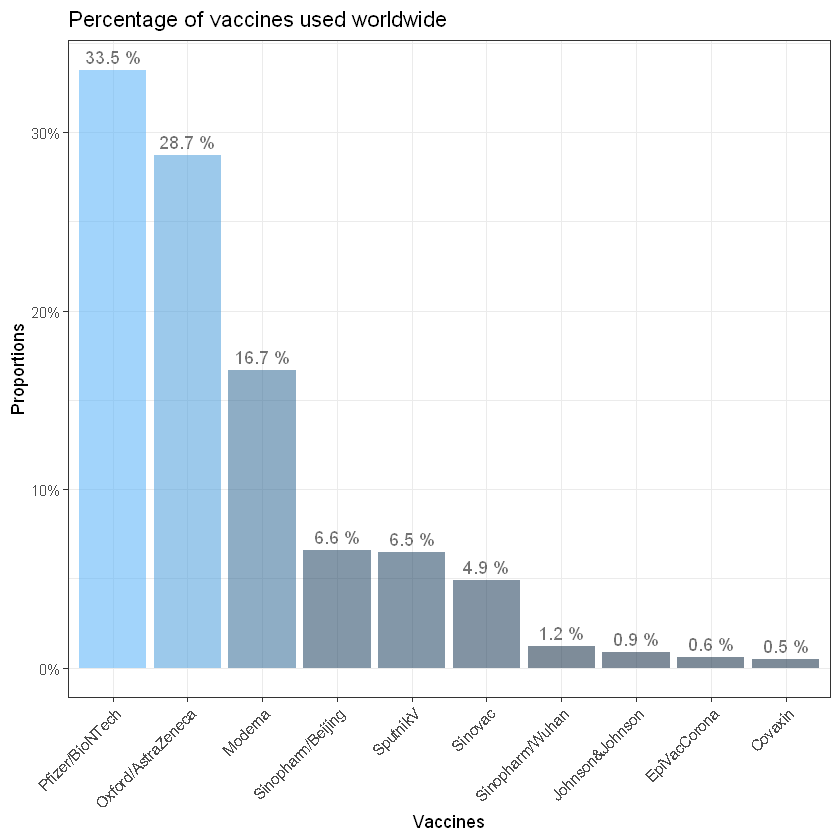

In [20]:
vaccine_data_val %>%
summarise_all(sum)%>%
gather(key="Vaccine_name", value = "Vaccine_count")%>%
mutate (Vaccine_count1 = round(Vaccine_count/sum(Vaccine_count),3))%>%
ggplot(mapping=aes(x=reorder(Vaccine_name,-Vaccine_count1), y=Vaccine_count1, fill =Vaccine_count1, alpha=0.7))+
geom_col()+
labs(x = "Vaccines", y = "Proportions", title  = "Percentage of vaccines used worldwide")+
geom_text(aes(label = paste(Vaccine_count1*100,"%")), vjust=-0.5)+
scale_y_continuous(labels = scales::percent) + 
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "None")



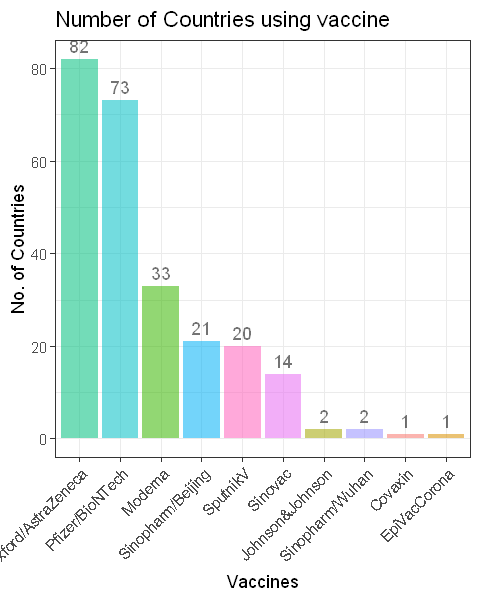

In [21]:
# No of countries using these vaccines

options(repr.plot.width=4, repr.plot.height=5)

vaccine_in_countries<- vaccine_data_val %>%
mutate(country = vaccine_data_copy$country)%>%
group_by(country)%>%
summarise_all(sum)

data <- data.frame("No_of_countries"= apply(vaccine_in_countries[-1],2, function(c)sum(c!=0)))
cbind("Vaccine"=row.names(data),data) %>%
ggplot(mapping=aes(x=reorder(Vaccine, -No_of_countries), y=No_of_countries, fill = Vaccine, alpha=0.5))+
geom_col() +
labs(x = "Vaccines", y = "No. of Countries", title  = "Number of Countries using vaccine")+
geom_text(aes(label = No_of_countries), vjust=-0.5)+
theme_bw()+
theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "None")


In [22]:
#Spread of Vaccine accrosss the world

world_data<- vaccine_data_copy[,c(2,length(vaccine_data_copy))] %>%
distinct()%>%
separate_rows(vaccines, sep=",")

81 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
162 codes from the map weren't represented in your data
71 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
172 codes from the map weren't represented in your data


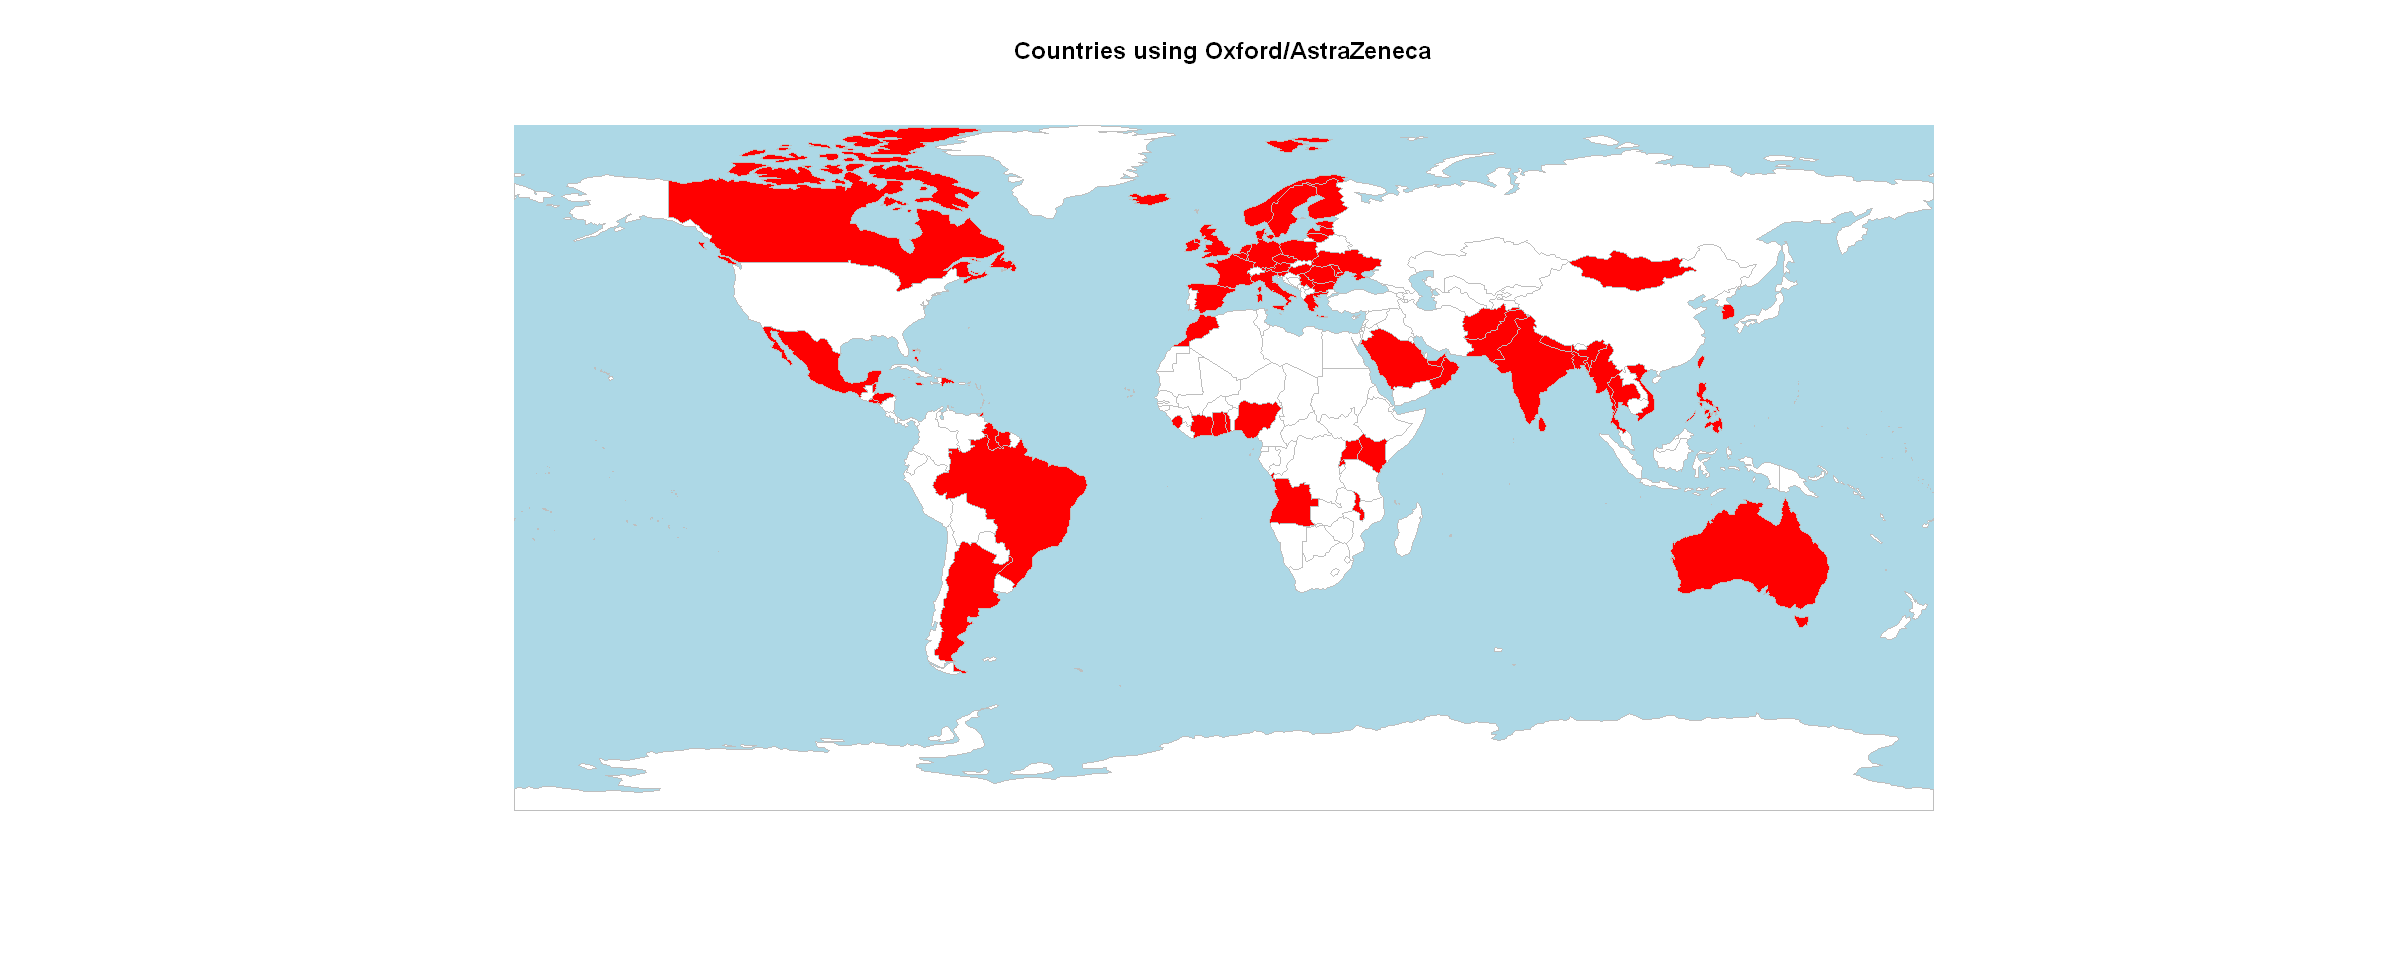

20 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
223 codes from the map weren't represented in your data


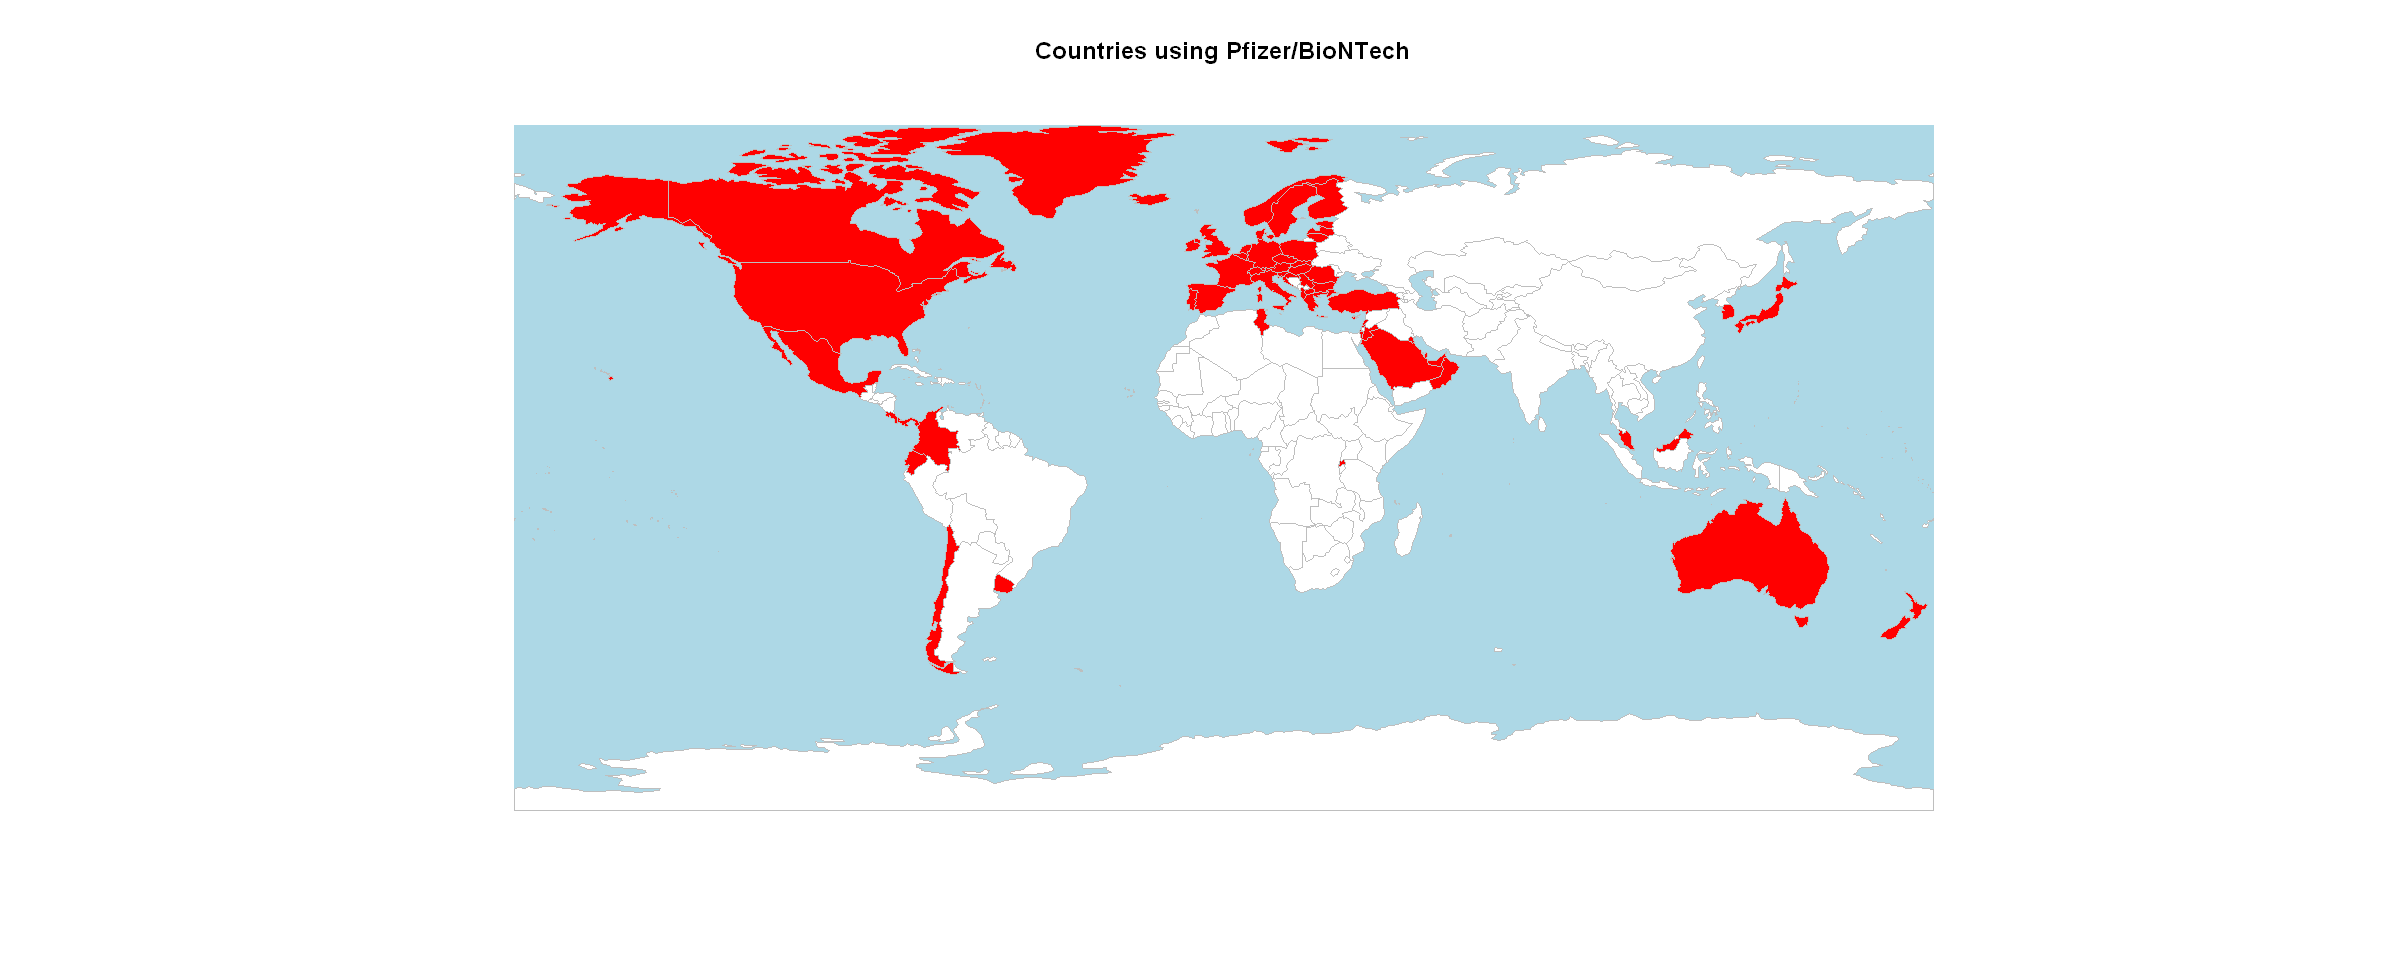

21 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
222 codes from the map weren't represented in your data


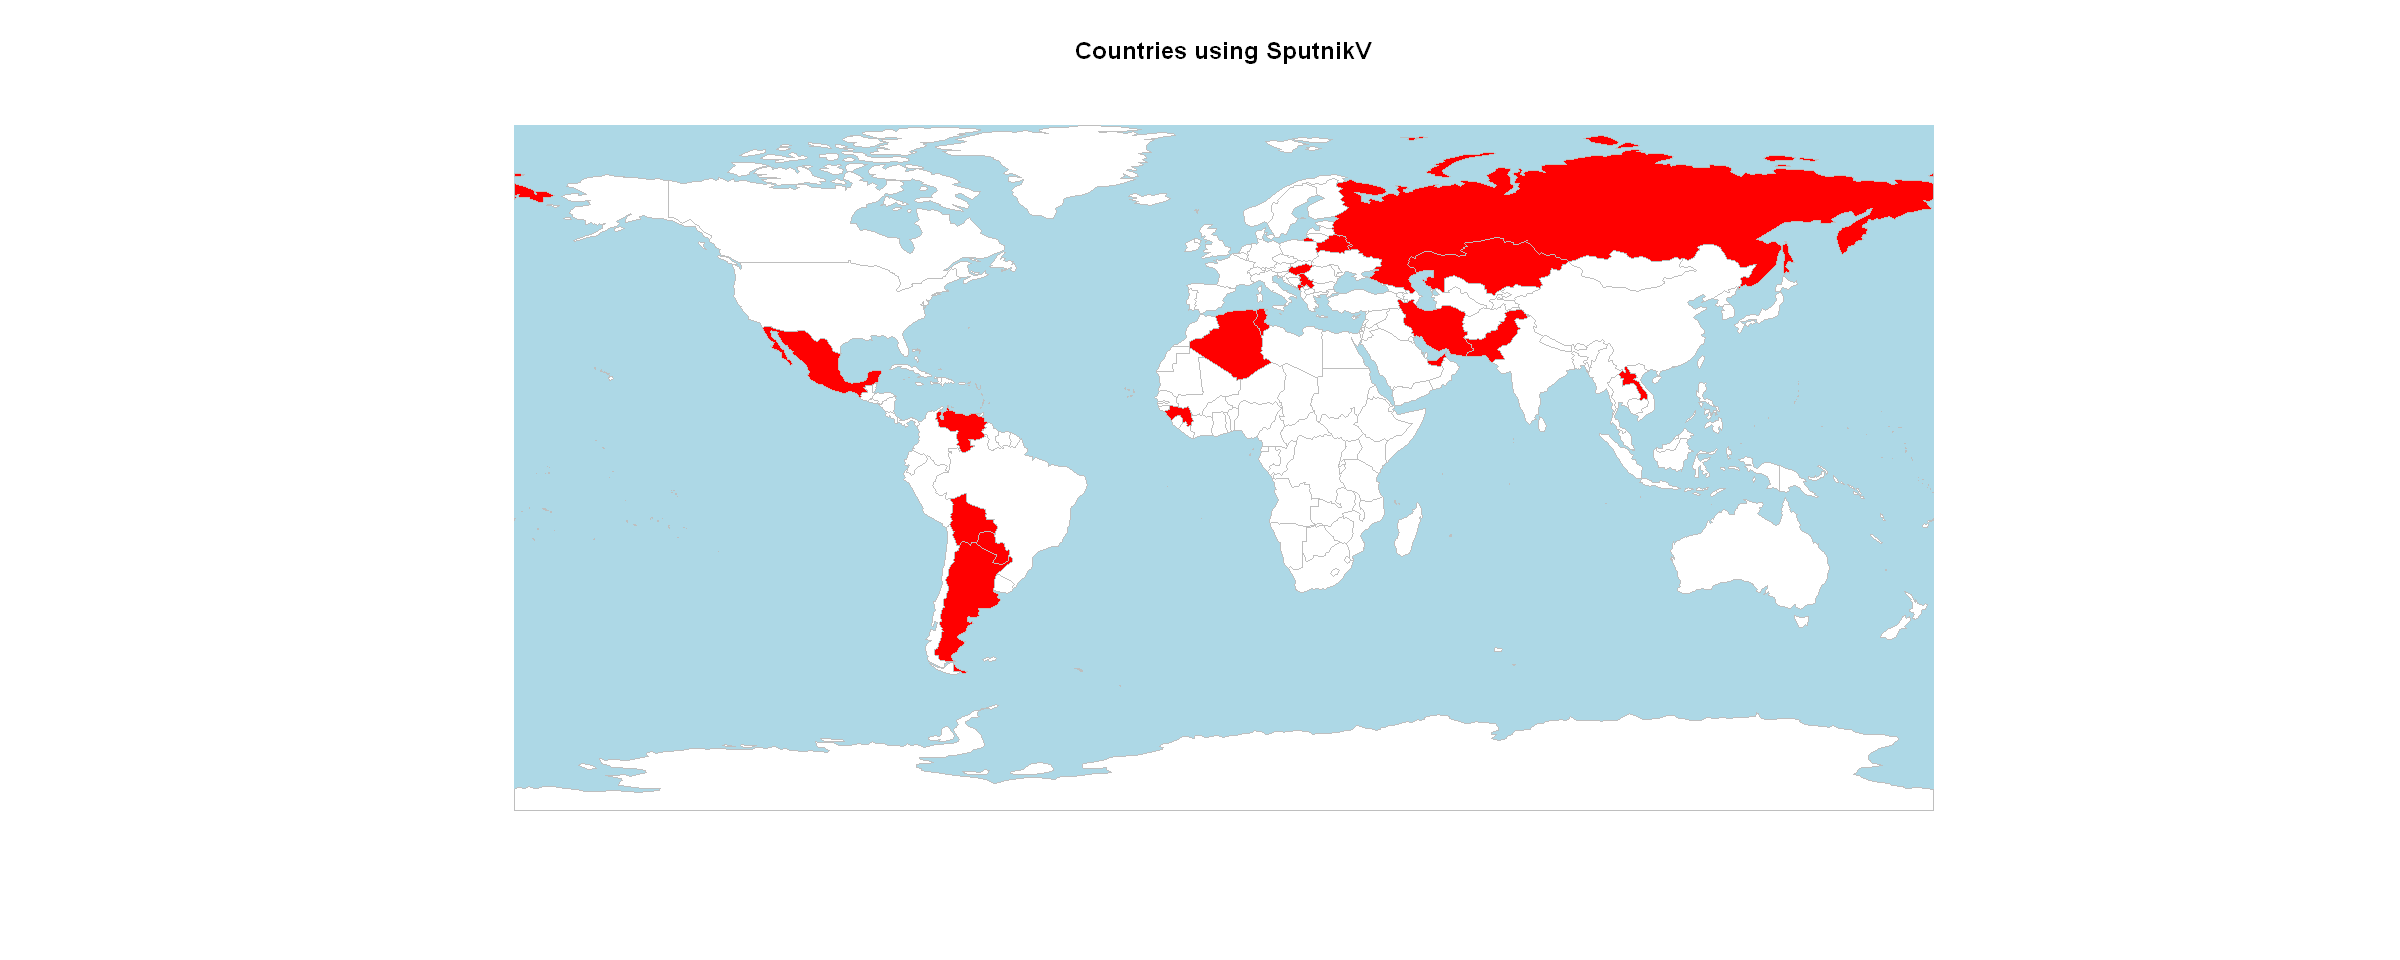

33 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
210 codes from the map weren't represented in your data


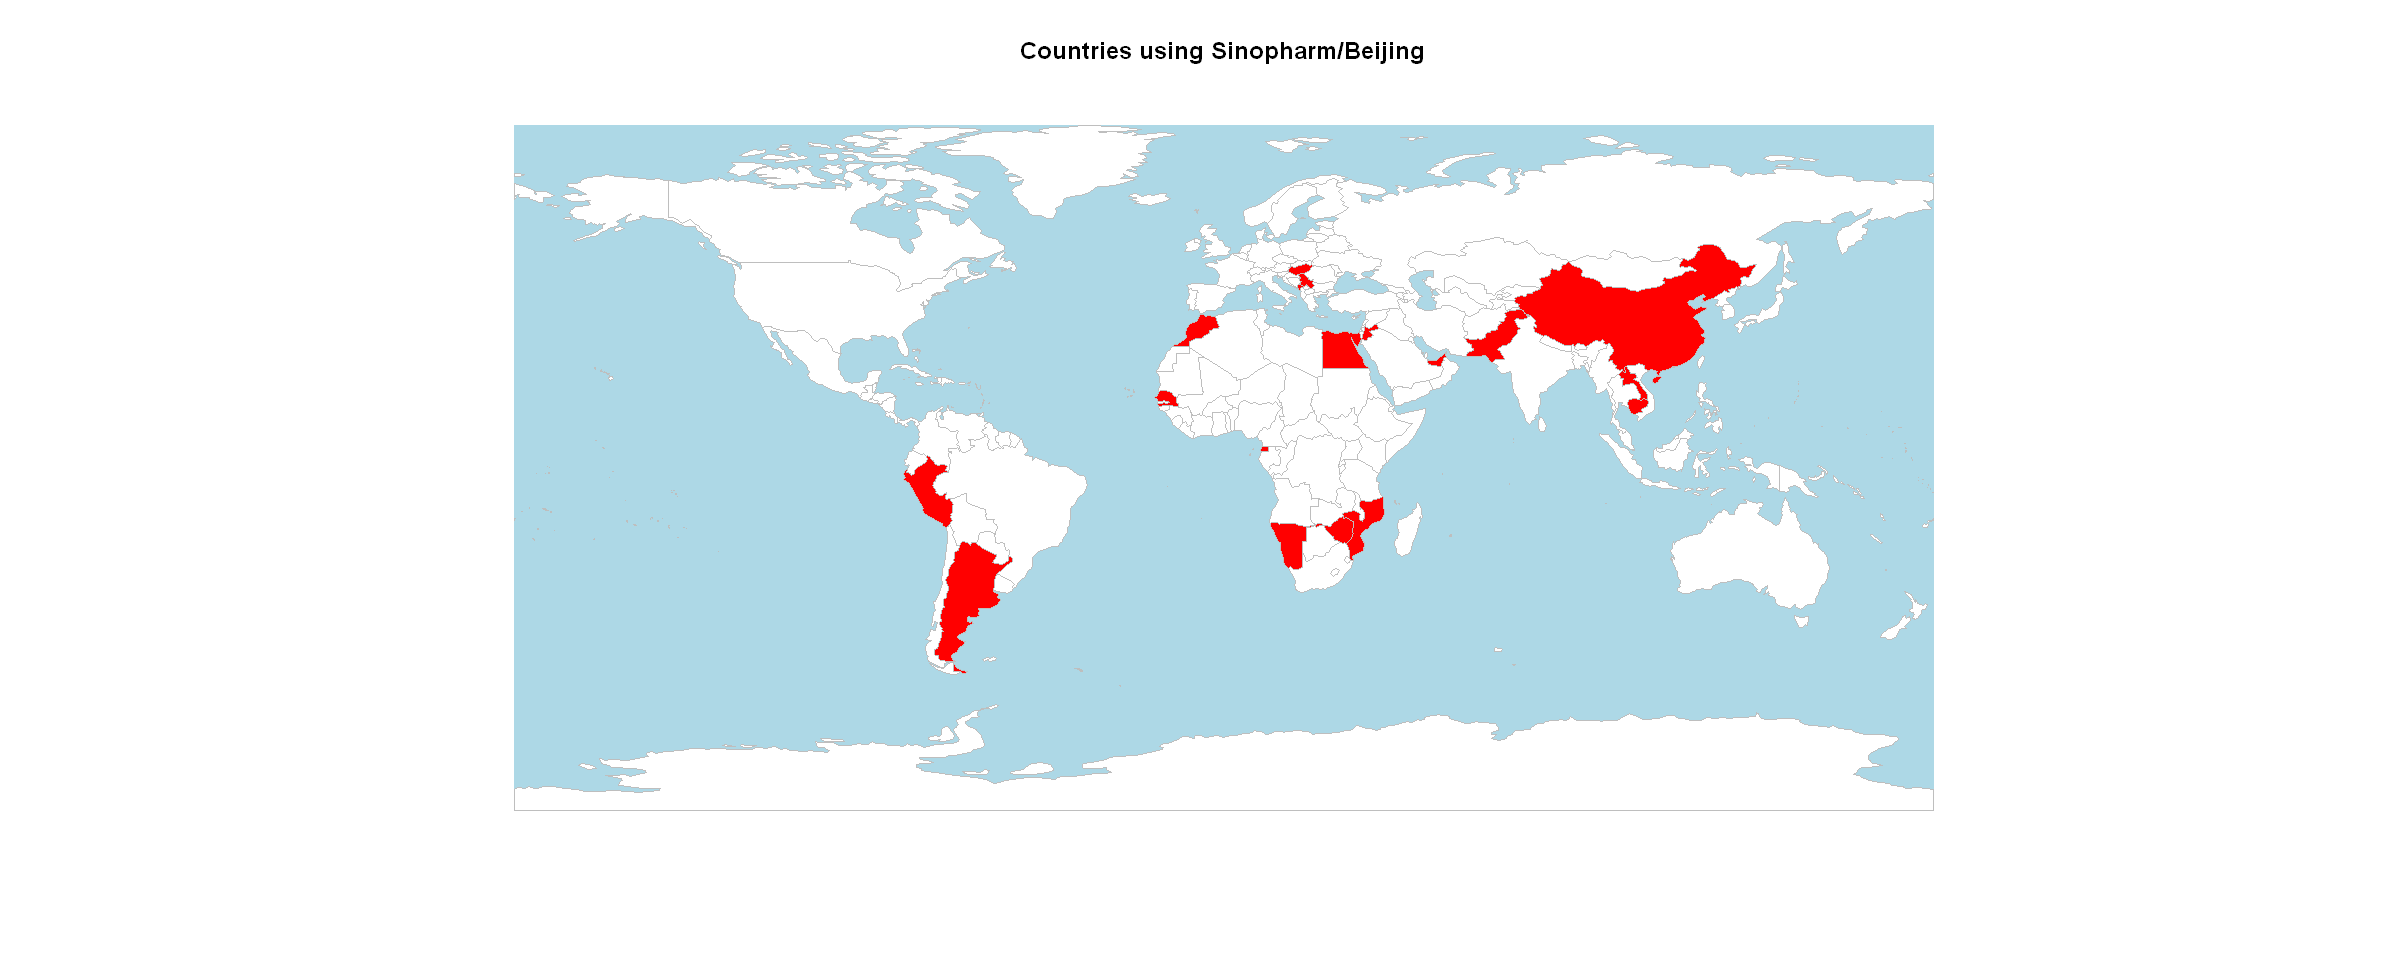

13 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
230 codes from the map weren't represented in your data


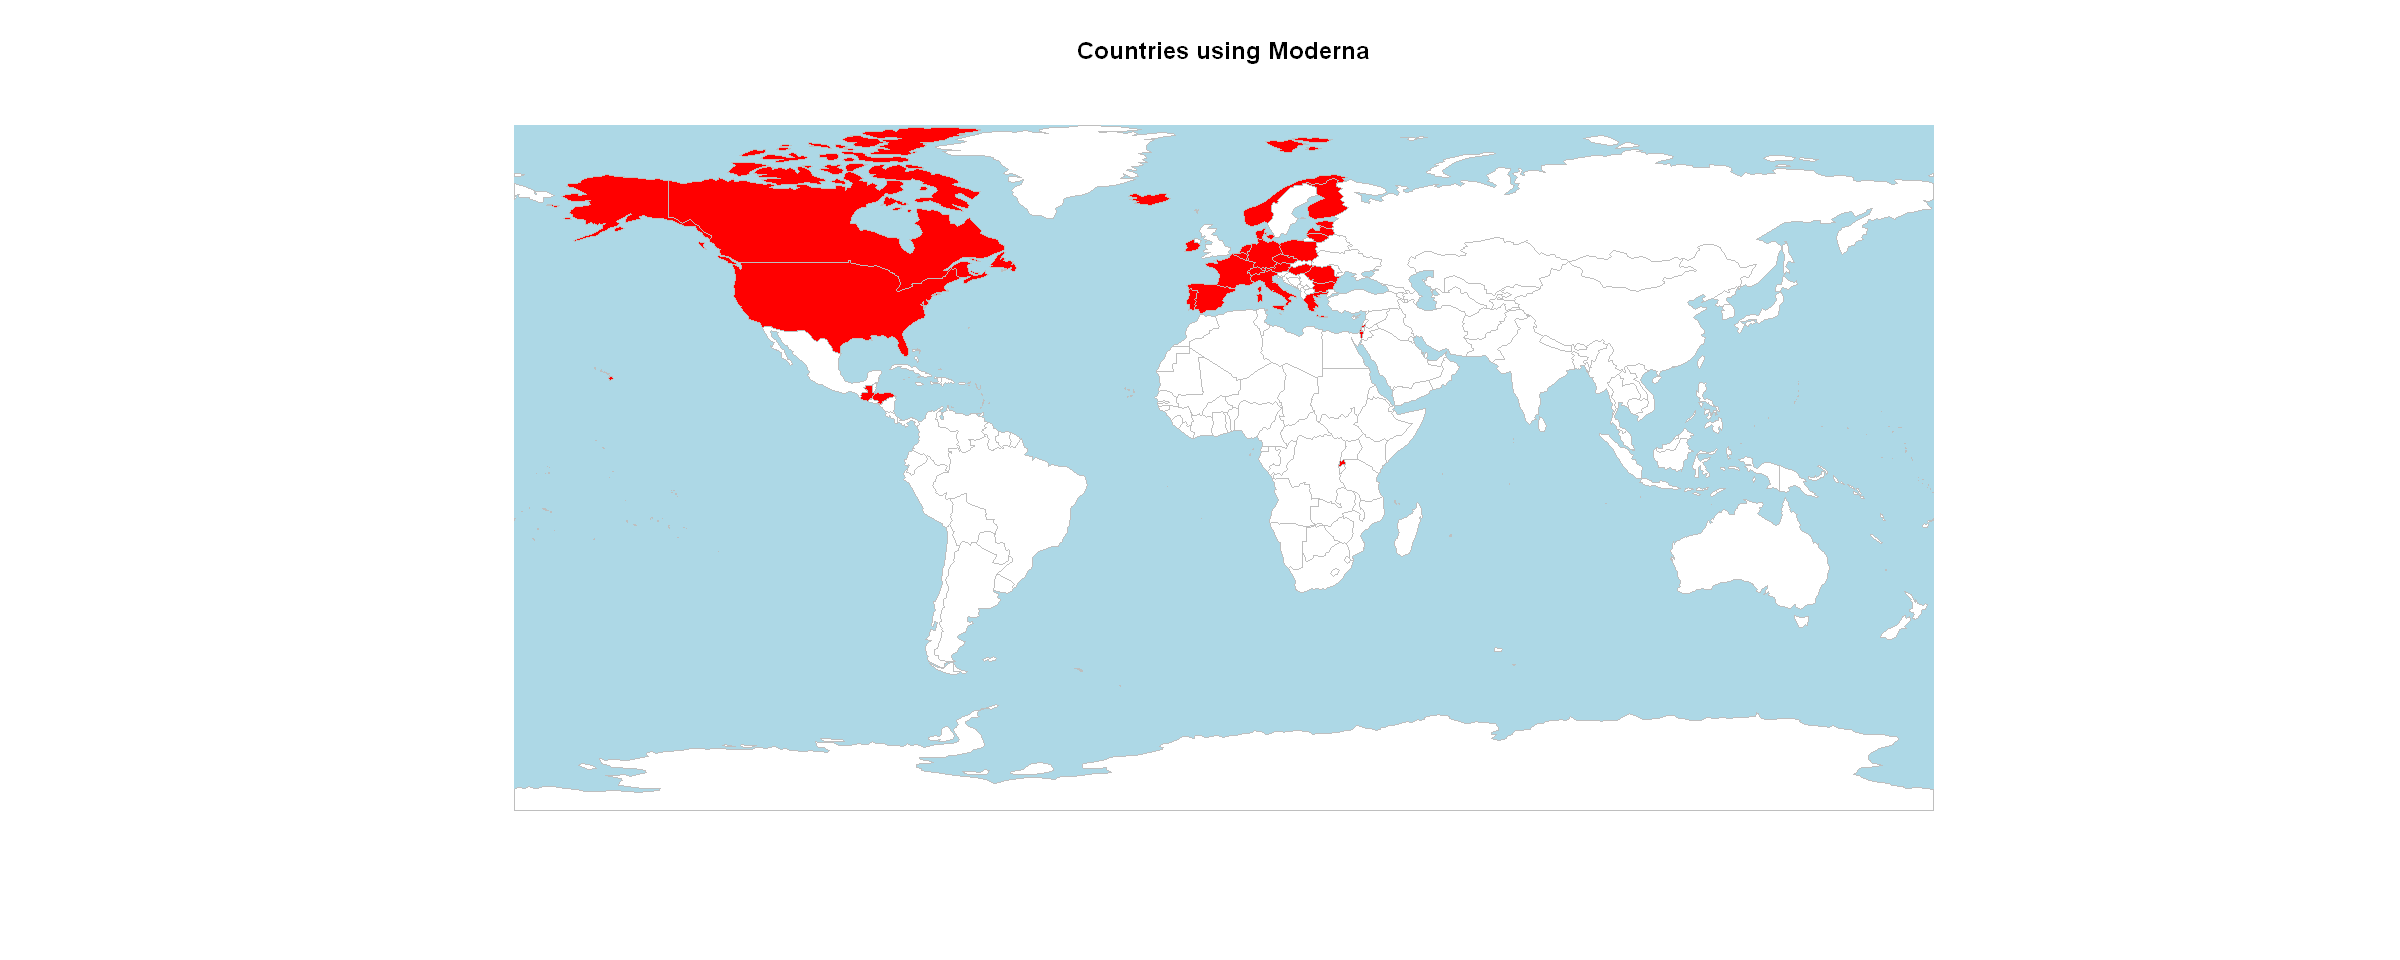

2 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
241 codes from the map weren't represented in your data


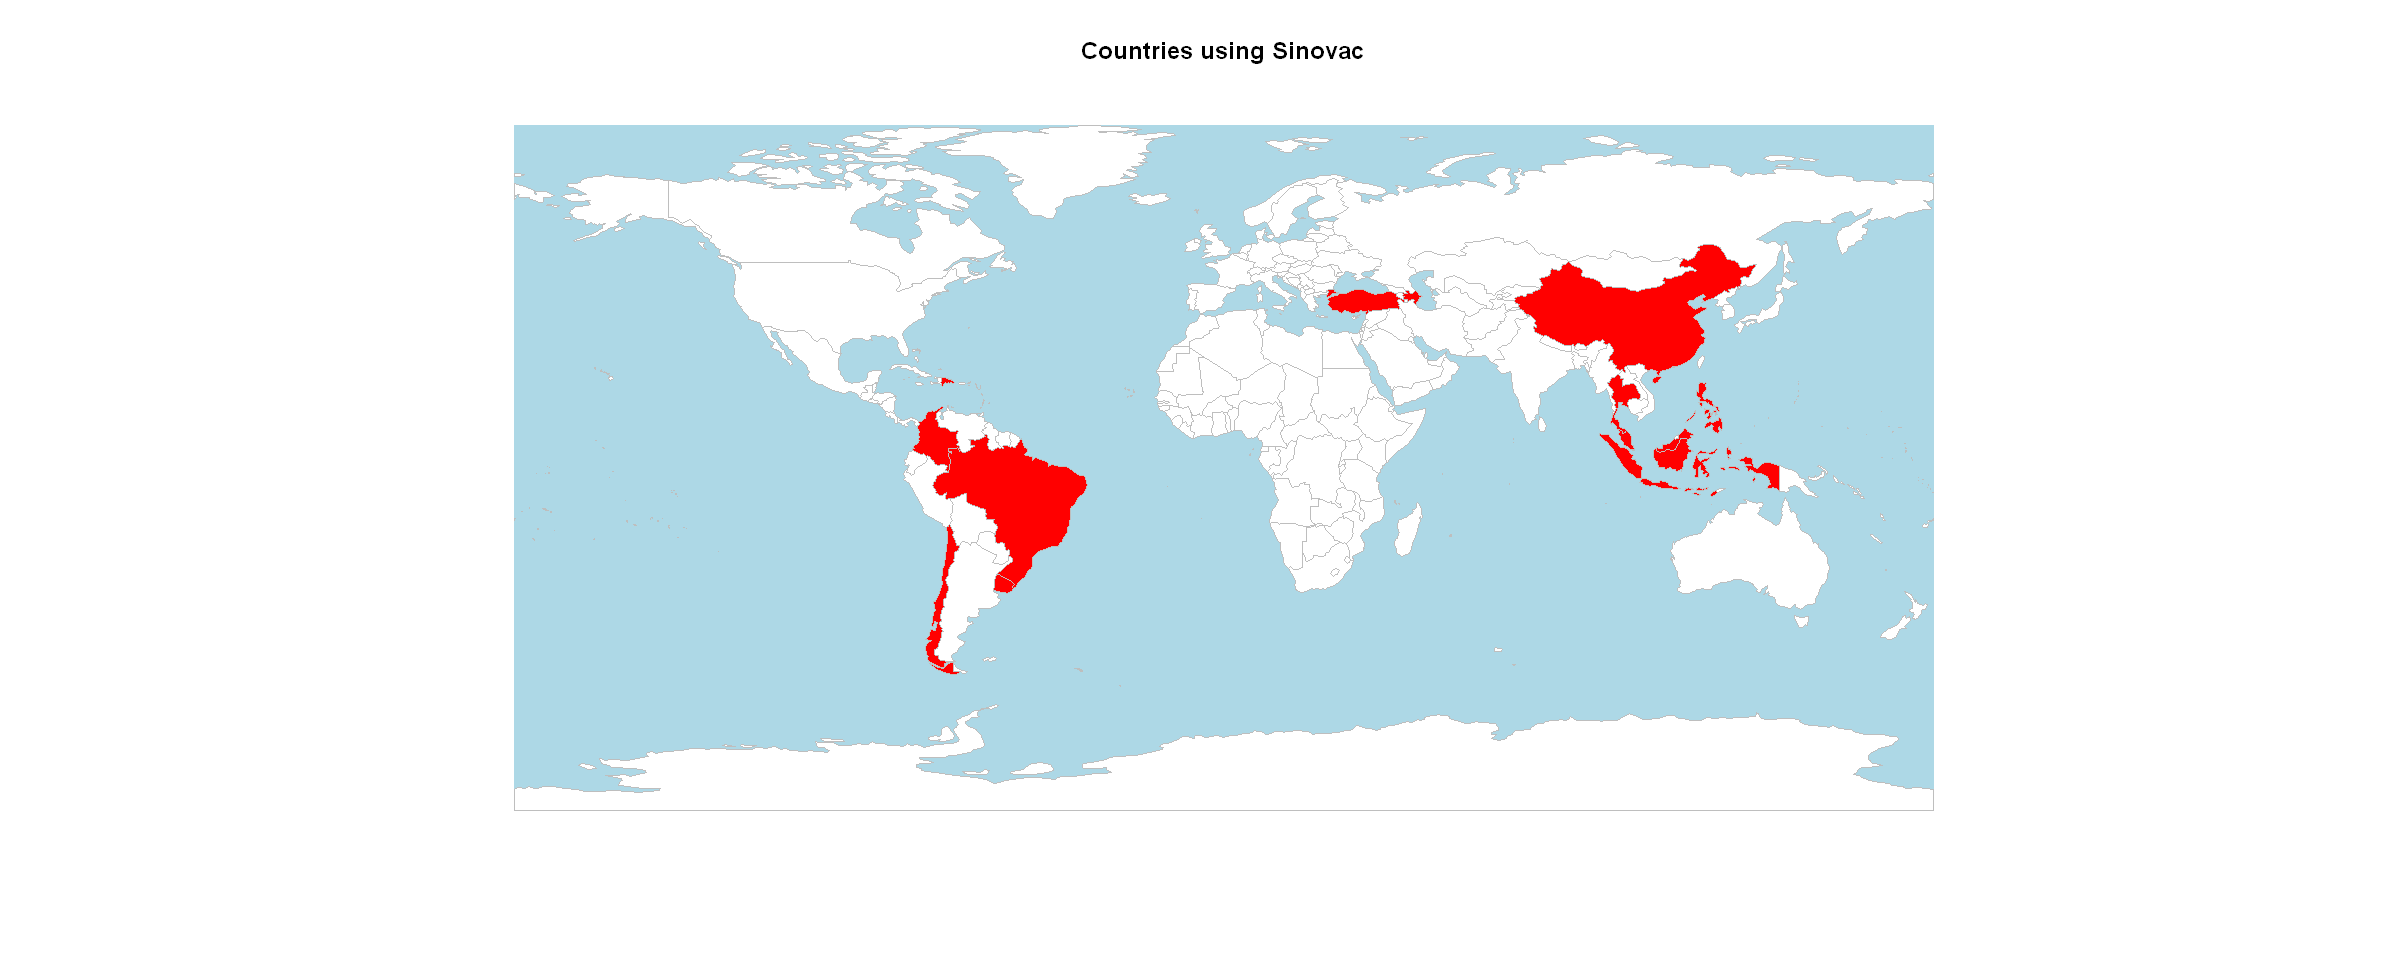

1 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
242 codes from the map weren't represented in your data


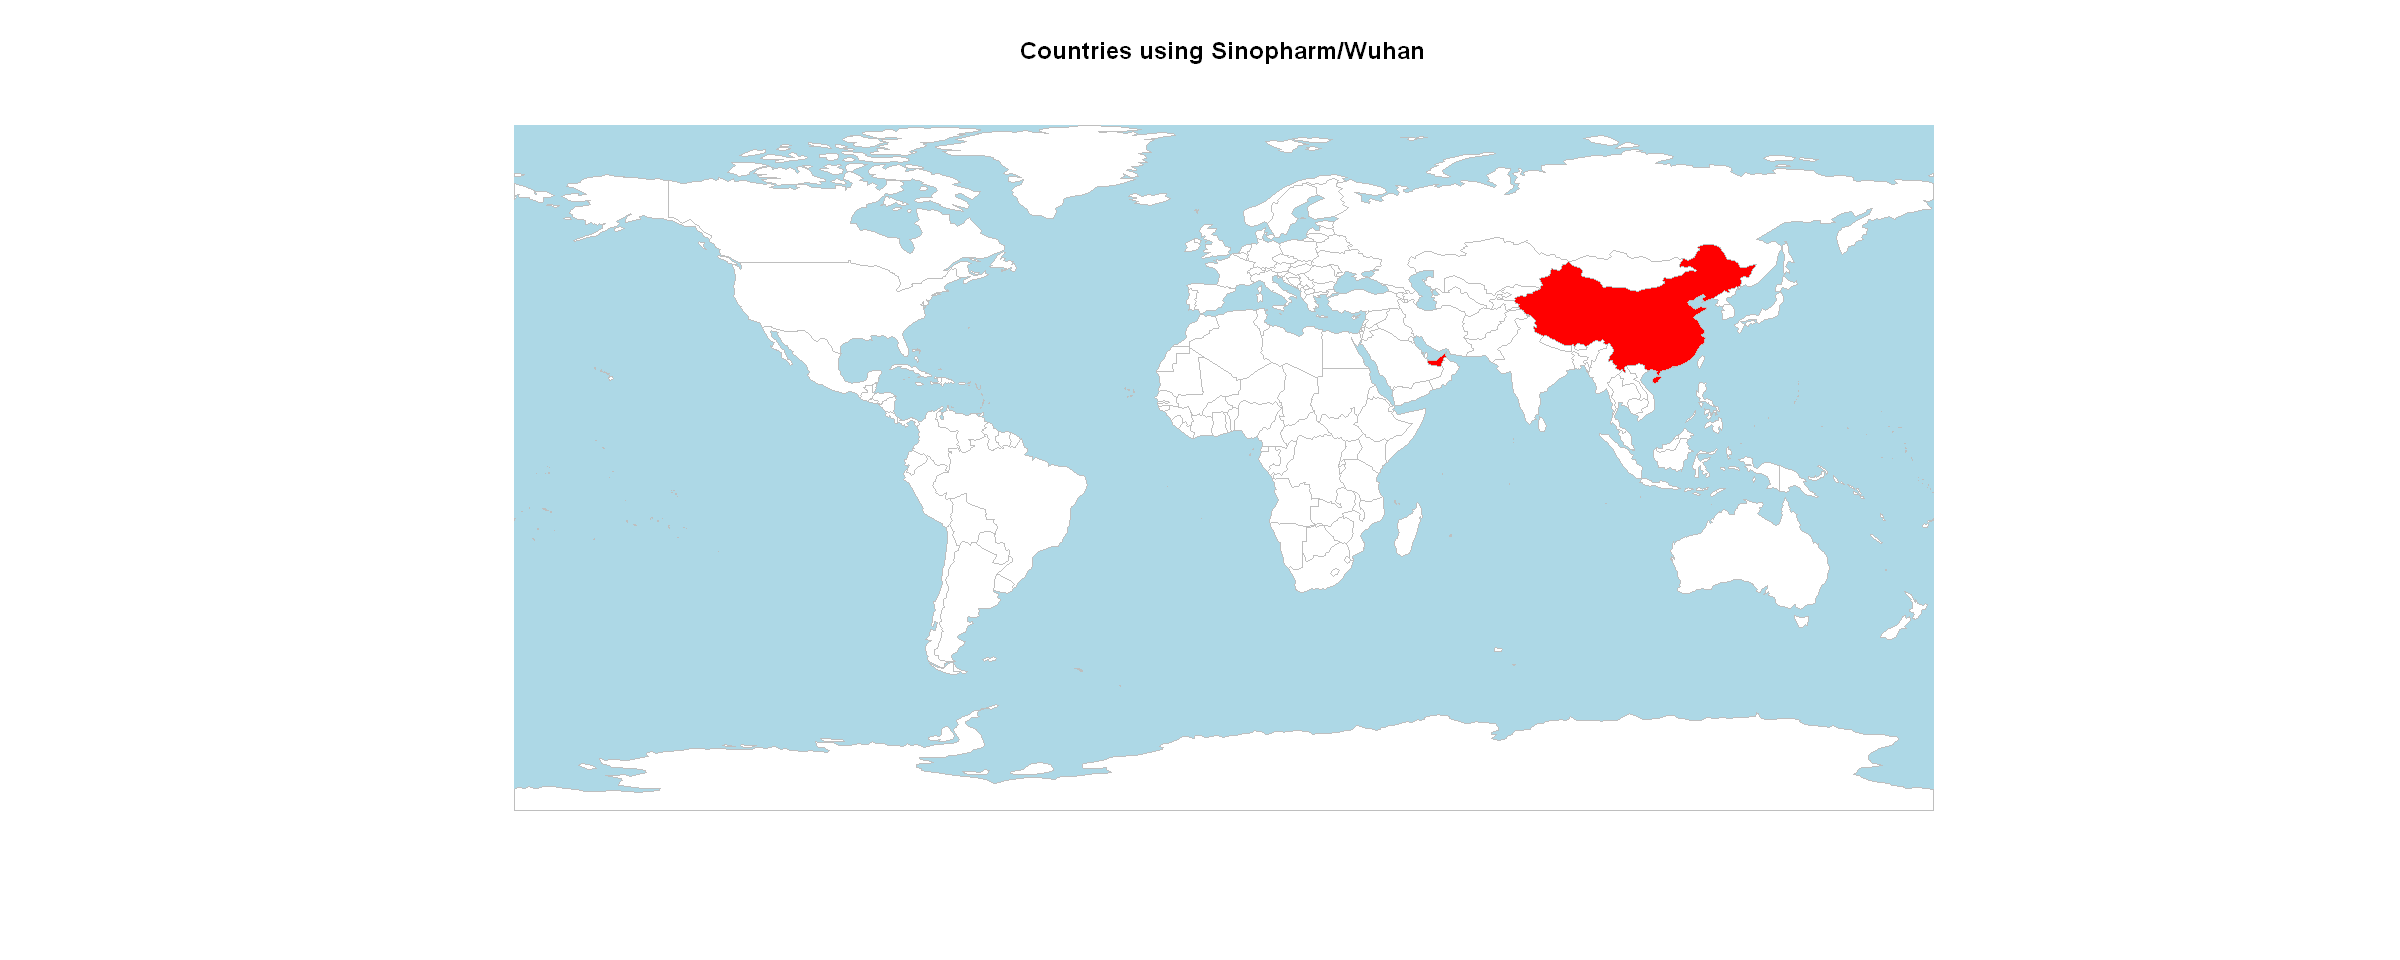

1 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
242 codes from the map weren't represented in your data


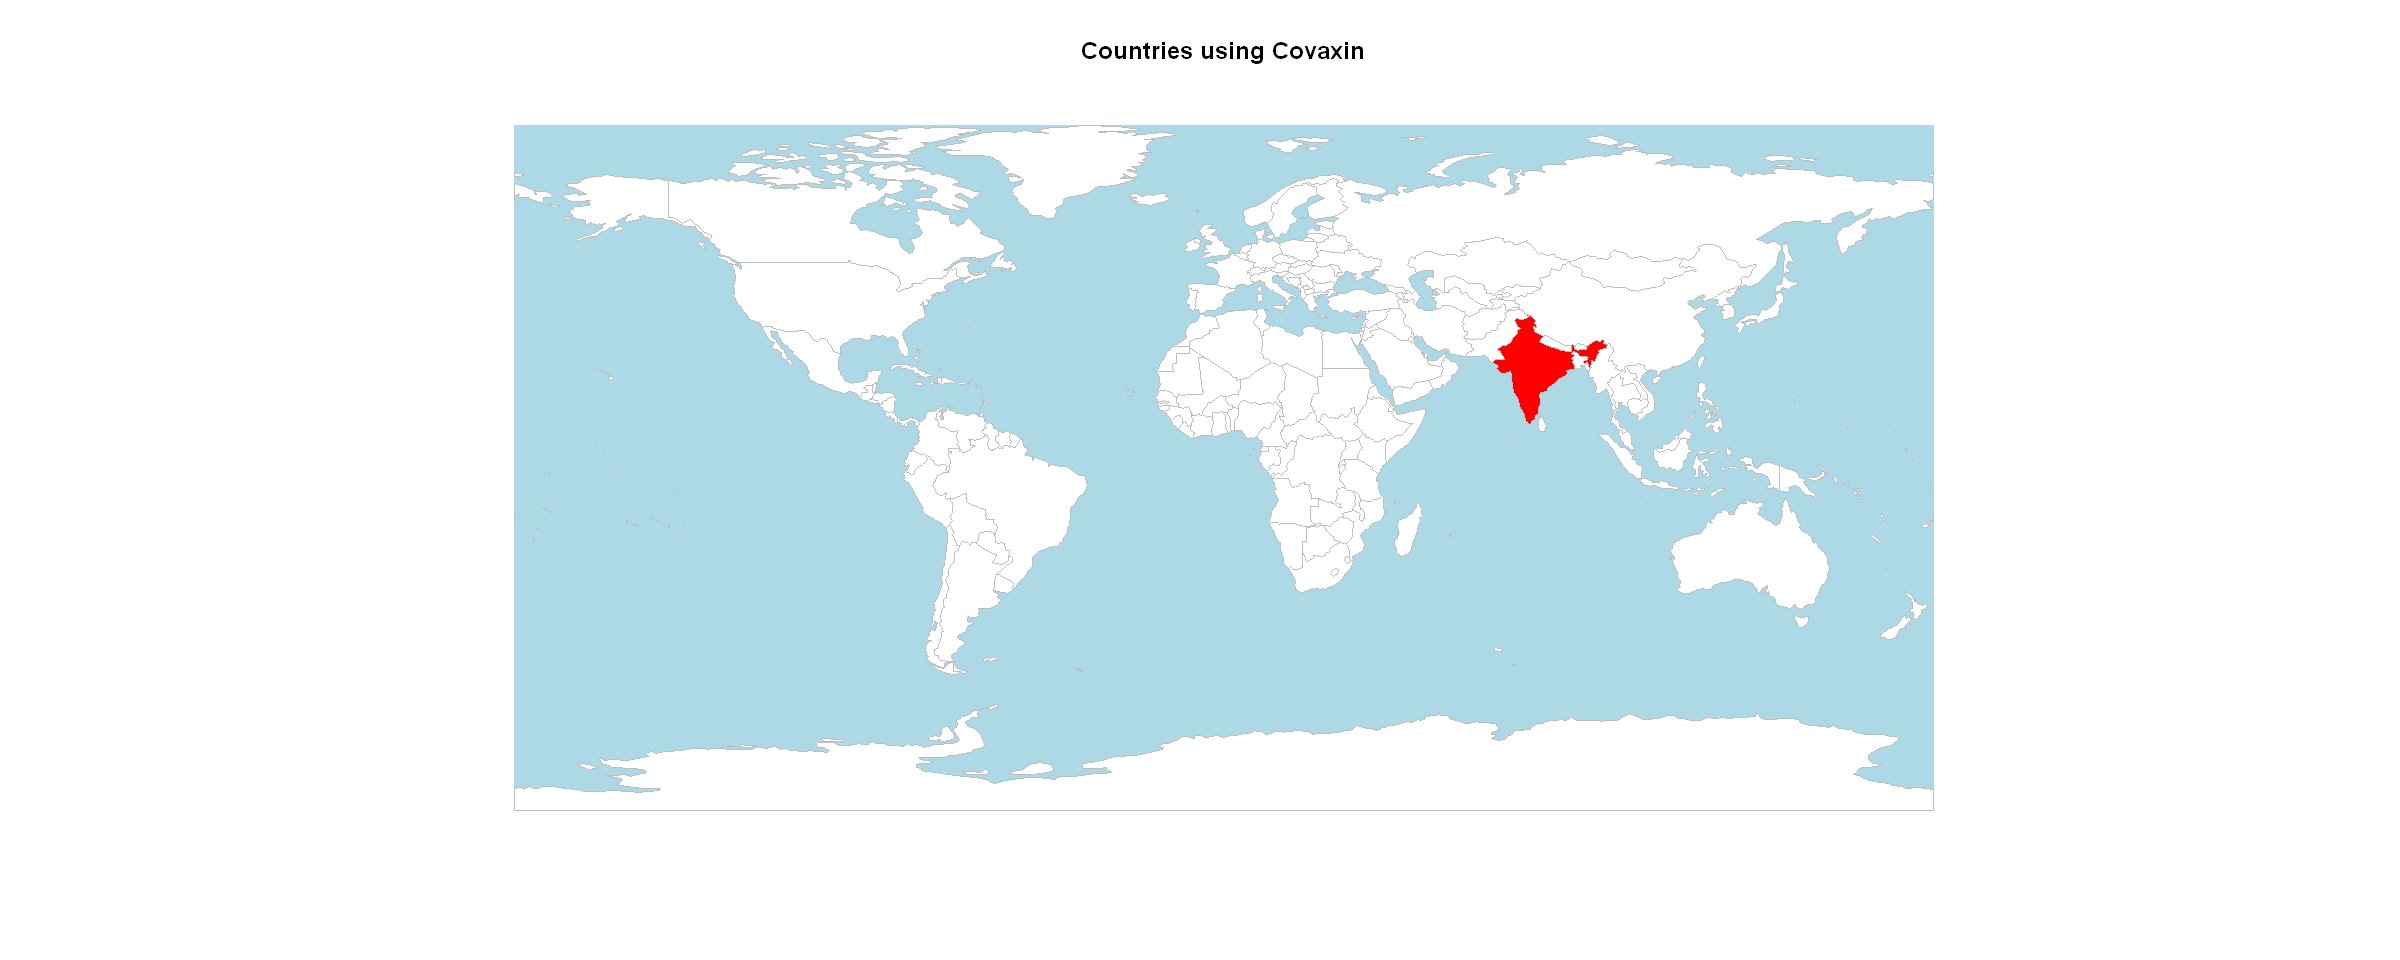

2 codes from your data successfully matched countries in the map
0 codes from your data failed to match with a country code in the map
241 codes from the map weren't represented in your data


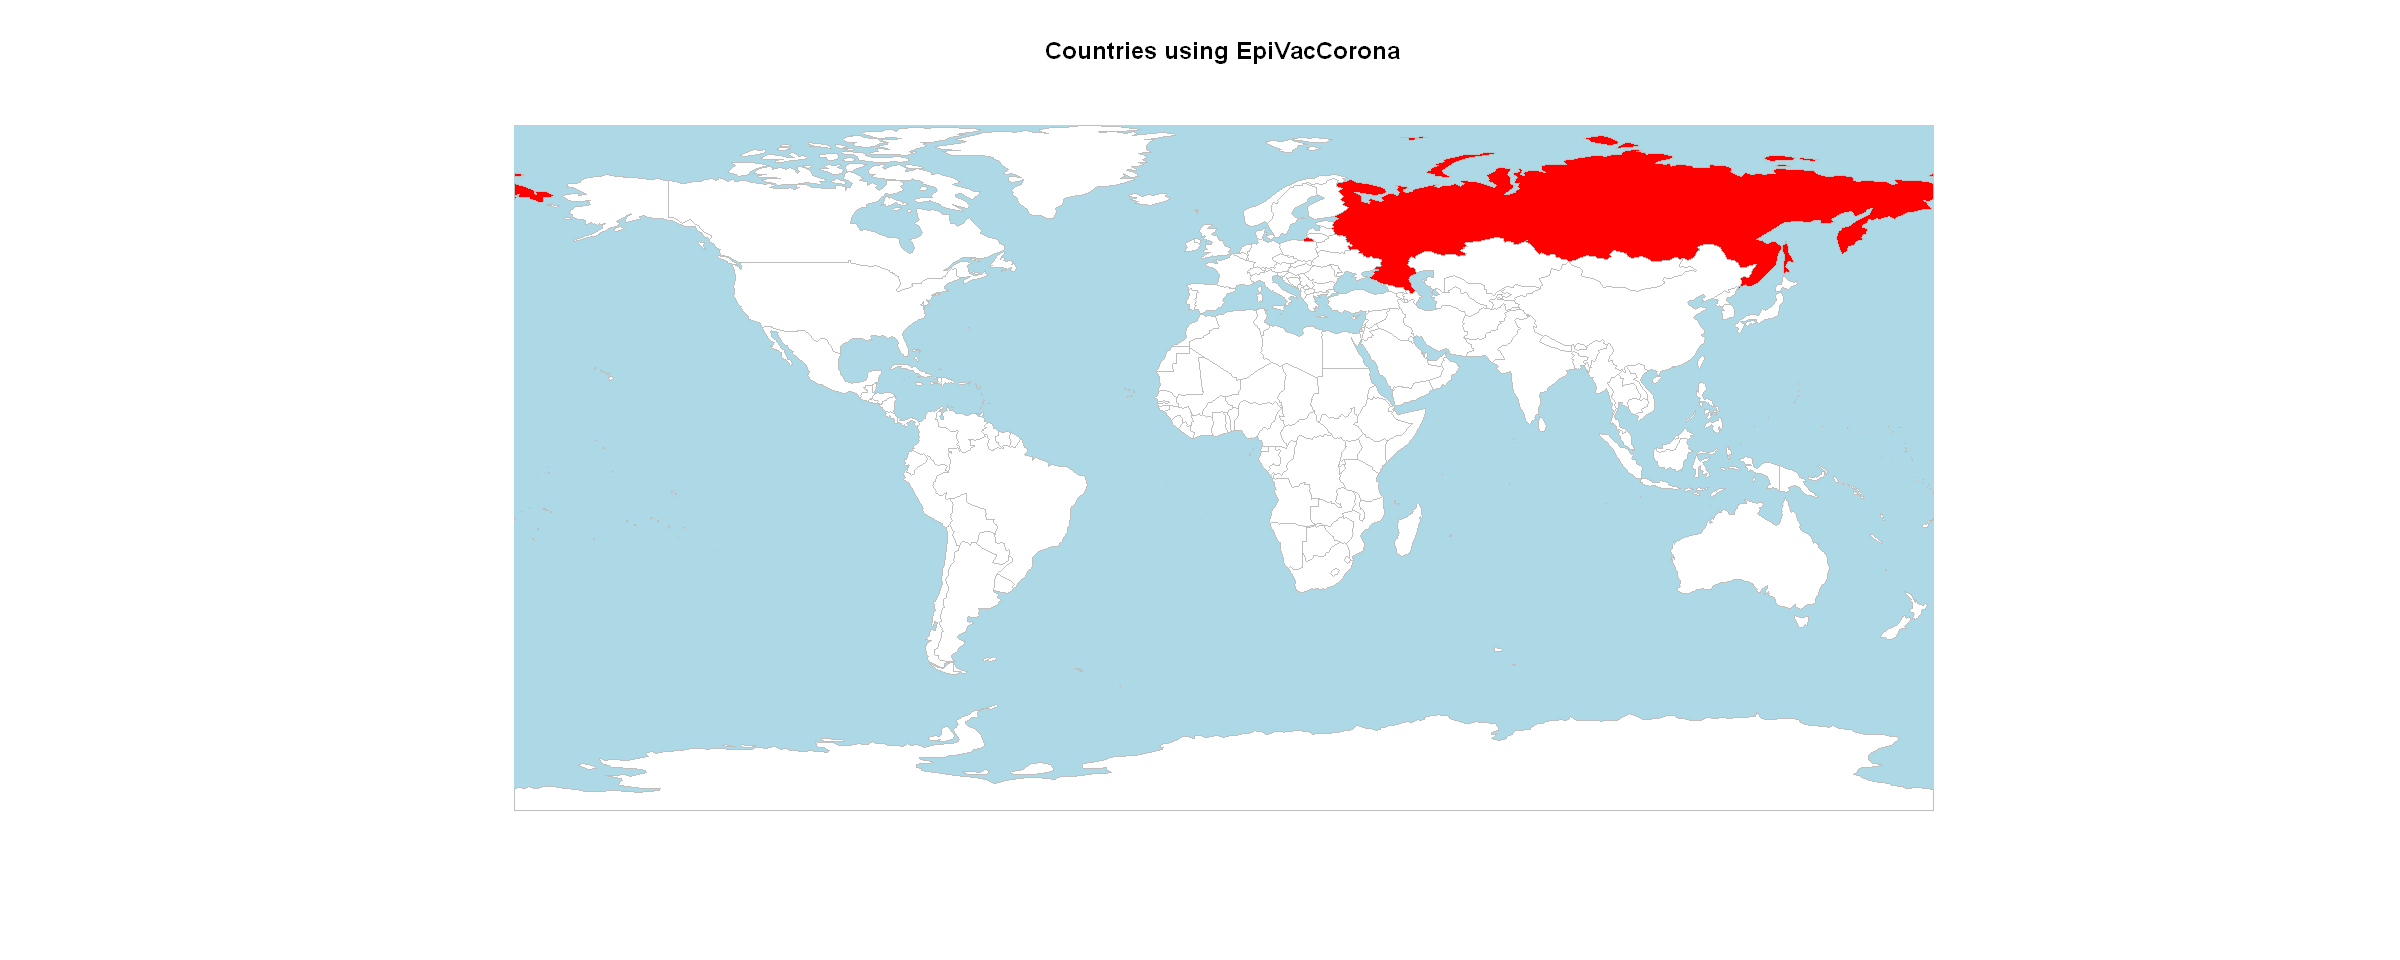

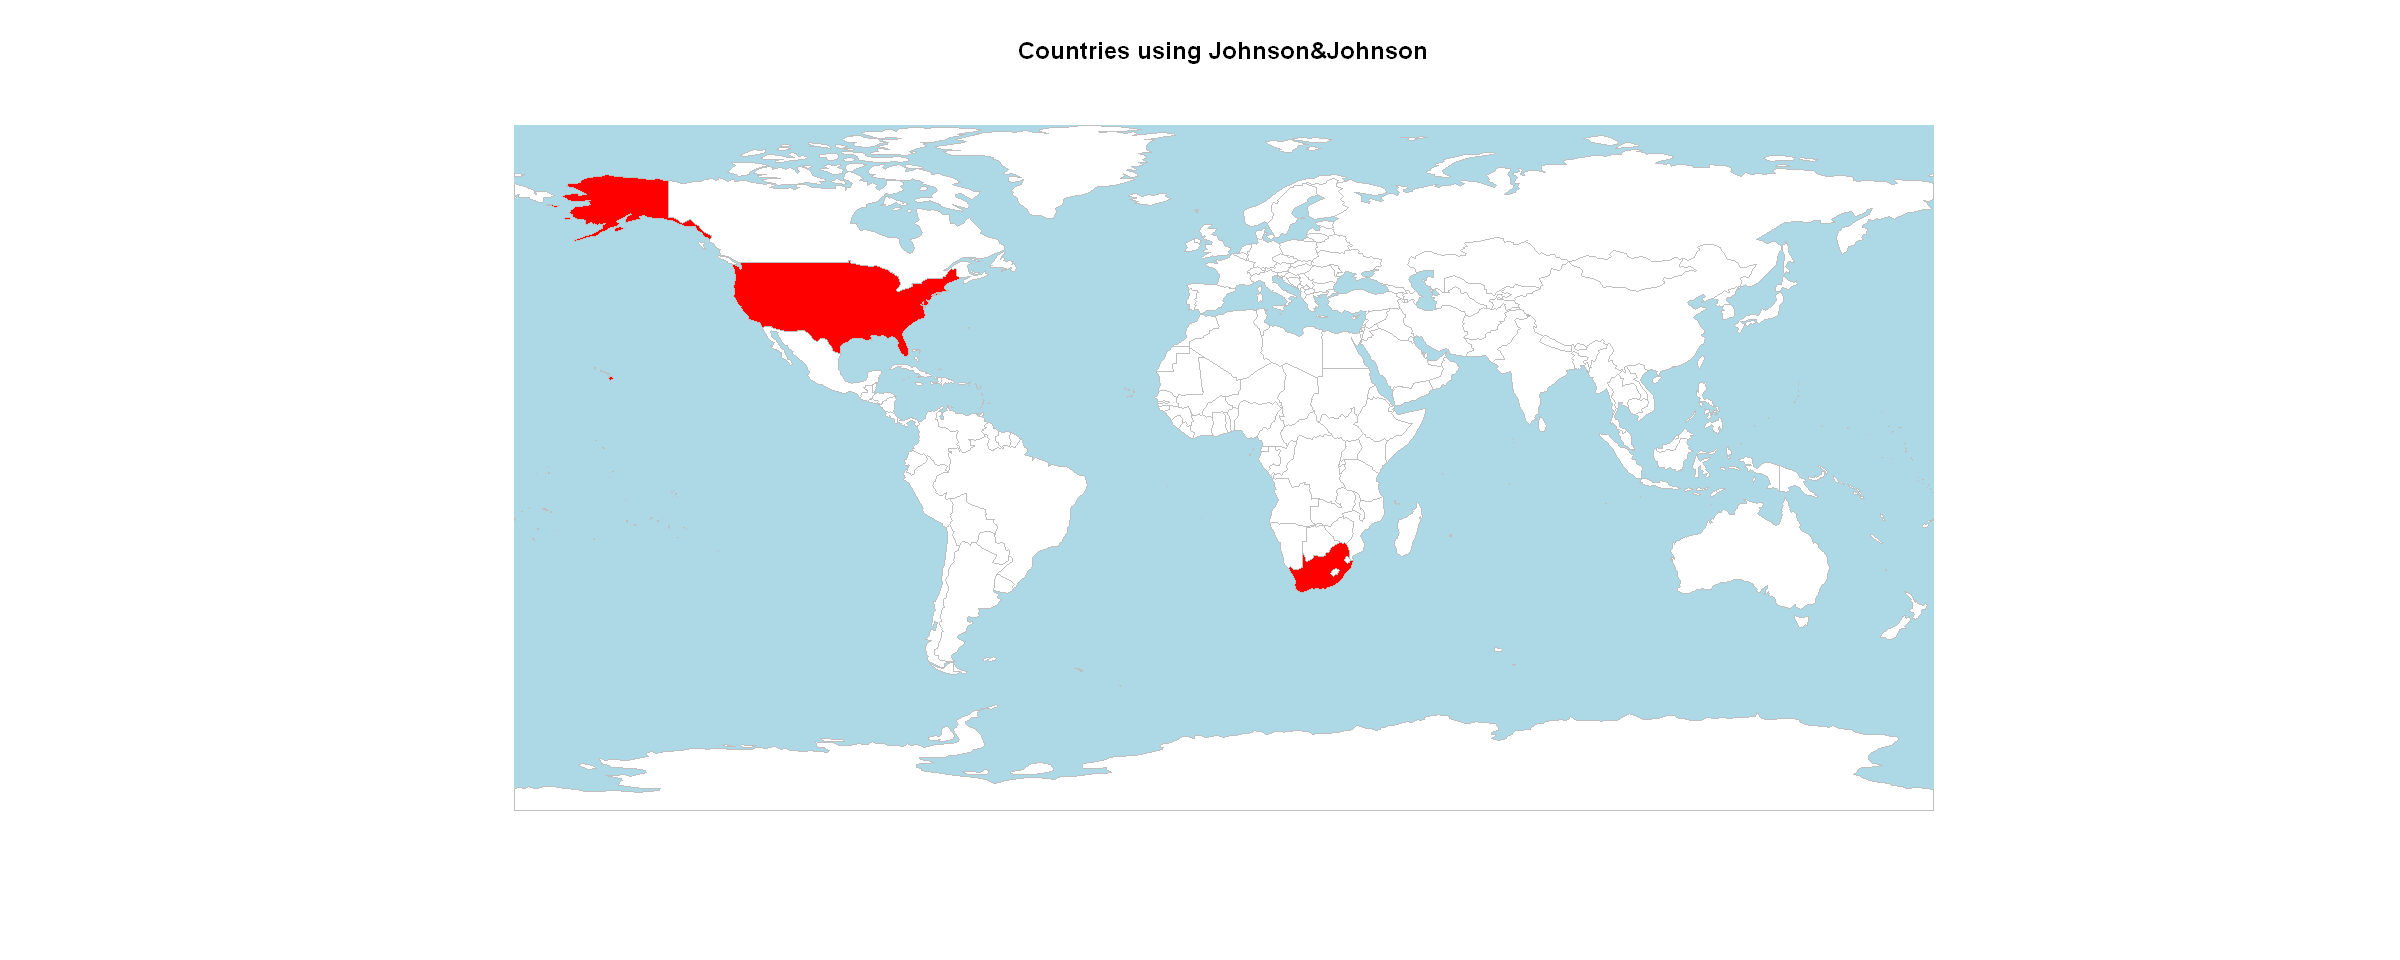

In [25]:
options(repr.plot.width=20, repr.plot.height=8)

plot_world_map <- function(iso,vacc) {
  d <- joinCountryData2Map(iso, joinCode = "ISO3",
      nameJoinColumn = "iso_code", verbose= FALSE)
  mapCountryData(d, nameColumnToPlot="vaccines", catMethod = "categorical",
    missingCountryCol = "white", addLegend = FALSE, mapTitle = paste("Countries using", vacc), oceanCol="lightblue")
}

plot_world_map(world_data[world_data$vaccines == "Oxford/AstraZeneca",],"Oxford/AstraZeneca")
plot_world_map(world_data[world_data$vaccines == "Pfizer/BioNTech",],"Pfizer/BioNTech")
plot_world_map(world_data[world_data$vaccines == "SputnikV",],"SputnikV")
plot_world_map(world_data[world_data$vaccines == "Sinopharm/Beijing",],"Sinopharm/Beijing")
plot_world_map(world_data[world_data$vaccines == "Moderna",],"Moderna")
plot_world_map(world_data[world_data$vaccines == "Sinovac",],"Sinovac")
plot_world_map(world_data[world_data$vaccines == "Sinopharm/Wuhan",],"Sinopharm/Wuhan")
plot_world_map(world_data[world_data$vaccines == "Covaxin",],"Covaxin")
plot_world_map(world_data[world_data$vaccines == "EpiVacCorona",],"EpiVacCorona")
plot_world_map(world_data[world_data$vaccines == "Johnson&Johnson",],"Johnson&Johnson")
#identifyCountries

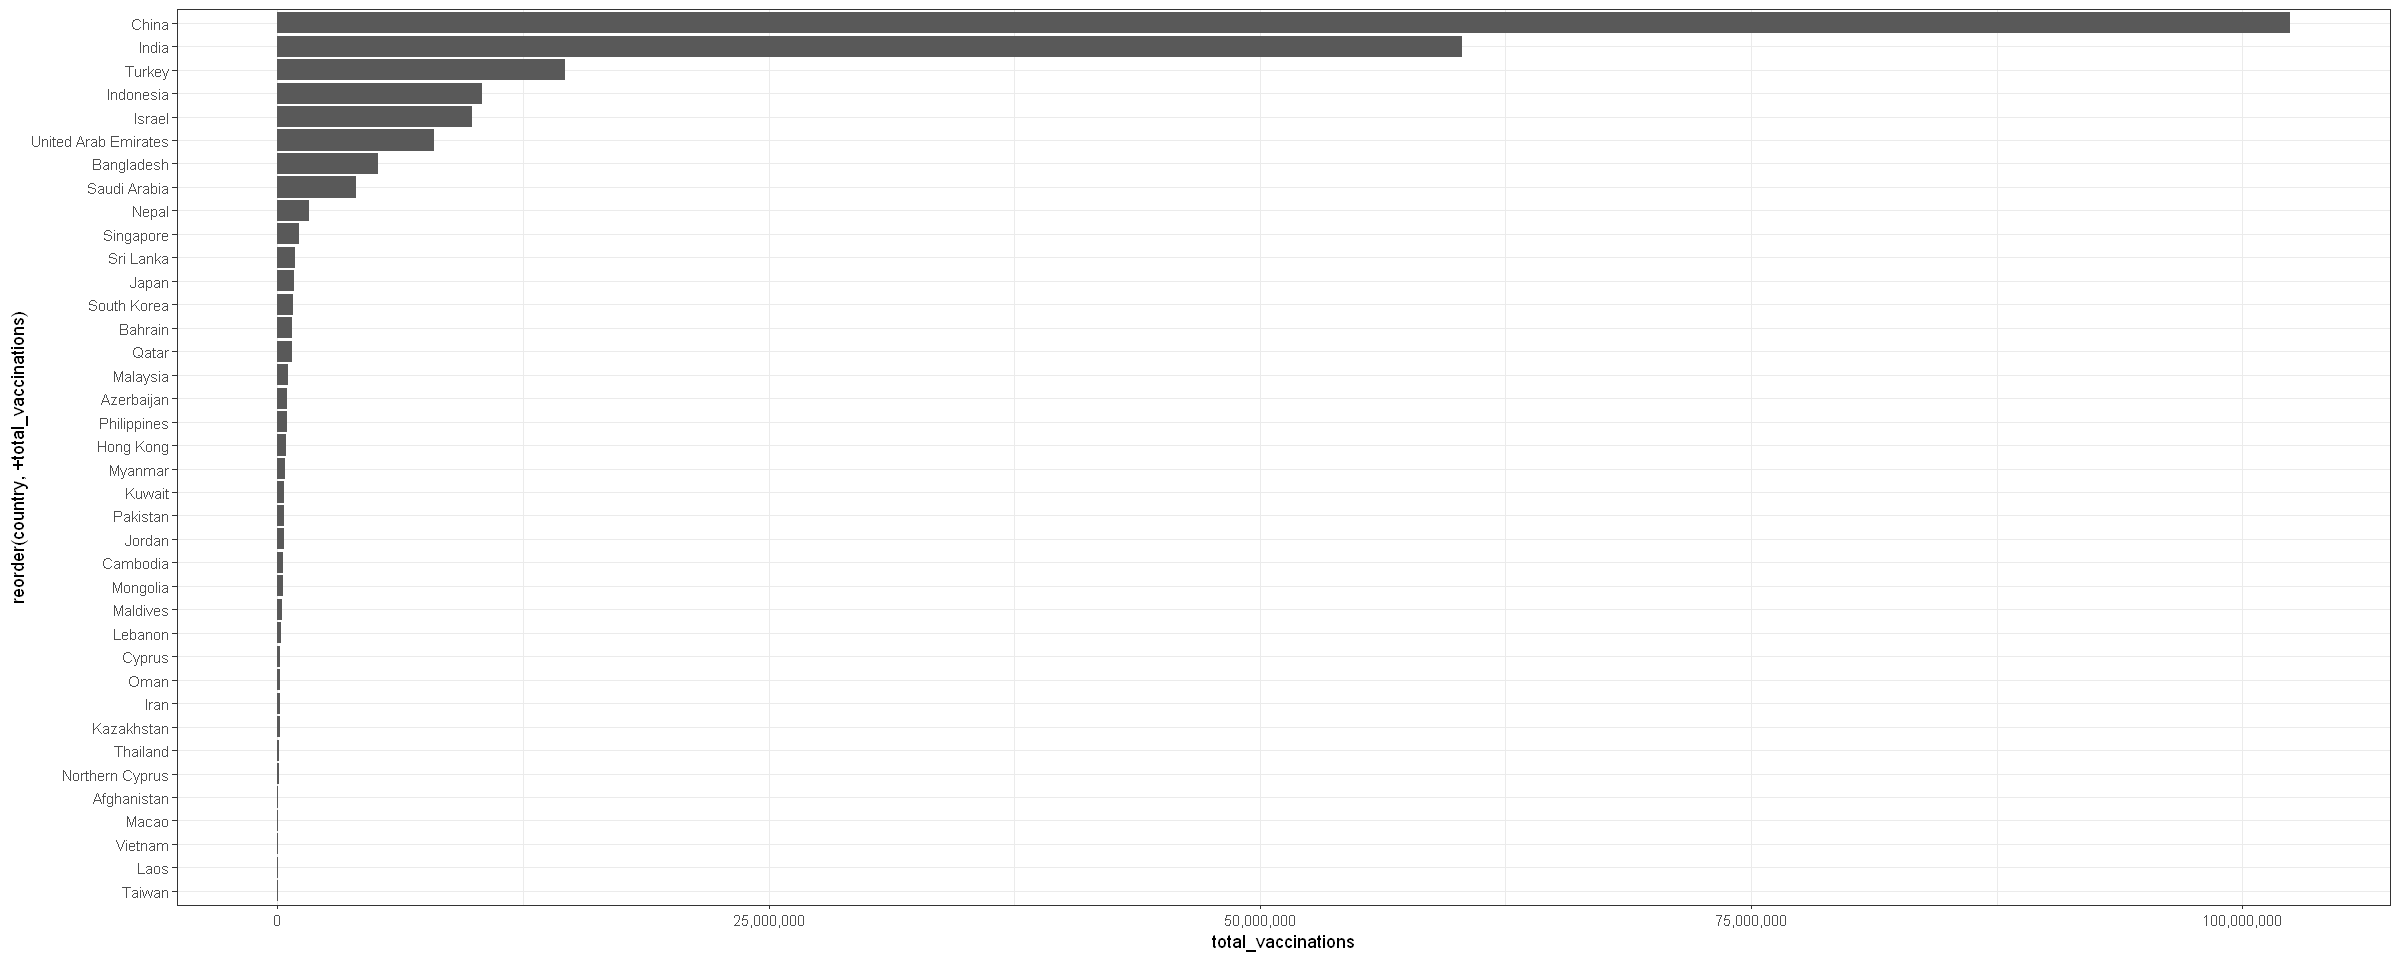

In [30]:
# Total vaccination in the countries
vaccine_data_copy <- vaccine_data_copy %>%
mutate("continent" = countrycode(sourcevar = vaccine_data_copy[, "country"],
                         origin = "country.name",destination = "continent"))


par(mfrow=c(2,2))

asia_data<- vaccine_data_copy %>%
select ("country","total_vaccinations","continent")%>%
filter(continent == "Asia")%>%
group_by(country)%>%
filter (total_vaccinations == max(total_vaccinations))

ggplot(asia_data, mapping=aes(x=reorder(country,+total_vaccinations), y=total_vaccinations))+
geom_col() +
coord_flip()+
scale_y_continuous(labels = scales::comma)+
theme_bw()

#as_widget(ggplotly(asia_data_plot))